# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [33]:
#  1. Get the total rides for each city type

# Get the number of rides by city type.
ride_total = pyber_data_df.groupby(["type"]).count()["ride_id"]


In [34]:
# 2. Get the total drivers for each city type

# Get the total number of drivers by city type.
drivers_total = city_data_df.groupby(["type"]).sum()["driver_count"]


In [55]:
#  3. Get the total amount of fares for each city type

# Get the total fare by city type.
fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]


In [56]:
#  4. Get the average fare per ride for each city type. 

# Get the average fare per ride for urban cities.
urban_fare_ride_average = fare_total.Urban/ride_total.Urban

# Get the average fare per ride for suburban cities.
suburban_fare_ride_average = fare_total.Suburban/ride_total.Suburban

# Get the average fare per ride for suburban cities.
rural_fare_ride_average = fare_total.Rural/ride_total.Rural


In [57]:
# 5. Get the average fare per driver for each city type. 

# Get the average fare per drivers for urban cities.
urban_fare_drivers_average = fare_total.Urban/drivers_total.Urban

# Get the average fare per drivers for suburban cities.
suburban_fare_drivers_average = fare_total.Suburban/drivers_total.Suburban

# Get the average fare per drivers for suburban cities.
rural_fare_drivers_average = fare_total.Rural/drivers_total.Rural


In [58]:
#  6. Create a PyBer summary DataFrame. 

# One way of creating the Data Frame
#data = {'Total Rides':[ride_total.Rural, ride_total.Suburban, ride_total.Urban],
#        'Total Drivers':[drivers_total.Rural, drivers_total.Suburban, drivers_total.Urban],
#        'Total Fares':[fare_total.Rural, fare_total.Suburban, fare_total.Urban],
#        'Average Fare per Ride':[rural_fare_ride_average, suburban_fare_ride_average, urban_fare_ride_average],
#        'Average Fare per Driver':[rural_fare_drivers_average, suburban_fare_drivers_average, urban_fare_drivers_average]}
 
#df = pd.DataFrame(data)

# Second way of creating the Dataframe

# Create the Averages into a series
fare_ride_average = [rural_fare_ride_average, suburban_fare_ride_average, urban_fare_ride_average]
fare_driver_average = [rural_fare_drivers_average, suburban_fare_drivers_average, urban_fare_drivers_average]

frame = { 'Total Rides': ride_total, 'Total Drivers': drivers_total, 'Total Fares': fare_total, 'Average Fare per Ride': fare_ride_average, 'Average Fare per Drive': fare_driver_average  }

#Create the Data frame
pyber_summary_df = pd.DataFrame(frame)



In [61]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [63]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Drive
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame


In [119]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_fares_df= pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_fares_df

fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33
...                          ...
Urban 2019-05-08 04:20:00 $21.99
      2019-05-08 04:39:49 $18.45
      2019-05-08 07:29:01 $18.55
      2019-05-08 11:38:35 $19.77
      2019-05-08 13:10:18 $18.04

[2375 rows x 1 columns]

In [120]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fares_df = sum_fares_df.reset_index()

In [122]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_fares_pivot = sum_fares_df.pivot(index="date", values="fare", columns="type")
sum_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [155]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

sum_fares_pivot_loc = sum_fares_pivot.loc['2019-01-01':'2019-04-28']
sum_fares_pivot_loc_df = pd.DataFrame(sum_fares_pivot_loc)

In [156]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
sum_fares_pivot_loc_df.index = pd.to_datetime(sum_fares_pivot_loc_df.index)
sum_fares_pivot_loc_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [157]:
# 7. Check that the datatype for the index is datetime using df.info()

sum_fares_pivot_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [158]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_pivot_resample = sum_fares_pivot_loc_df.resample("W").sum()

#sum_fares_pivot_resample.index.name = None

sum_fares_pivot_week = pd.DataFrame(sum_fares_pivot_resample)
sum_fares_pivot_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


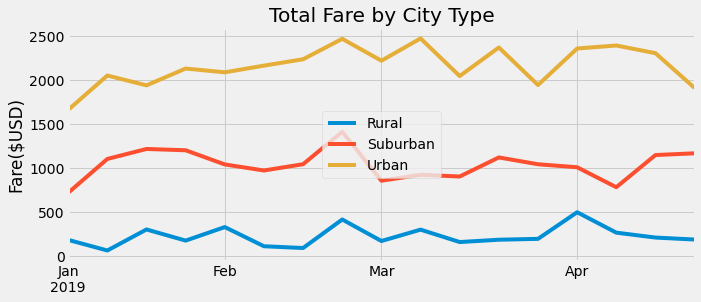

In [181]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Setting size for the graph
plt.rcParams['figure.figsize'] = [10, 4]

# Draw the line graph
sum_fares_pivot_week.plot.line()

#No x-label
plt.xlabel("")
# Add Y Label
plt.ylabel("Fare($USD)")

# Create a title.
plt.title("Total Fare by City Type")
# Place legend at center
plt.legend(loc='center')

#Save figure
plt.savefig("analysis/Fig8.png")
